### Q1 (15 marks)

Select two datasets and create a user defined function in Python that leverages the fundamental features of the Python without using Pandas built in functions such as

(numeric_df =df.select_dtypes(include=['number'])

categorical_df = df.select_dtypes(exclude=['number'])
 
Your function should accept a Data Frame as input and categorize its columns into numeric and categorical types, then display the lists of numeric and categorical columns. Include a section in your report where you discuss your interpretation of this task and its significance within the field of artificial intelligence and make sure to run the code and attach a screenshot of your machine in the appendix of your report. 


In [2]:
import csv

def categorize_columns(filename):

    numeric_cols = []
    categorical_cols = []

    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Extract the header row

        # Assuming the first row contains sample data
        sample_row = next(reader)

        for i, value in enumerate(sample_row):
            try:
                float(value)  # Attempt to convert to float
                numeric_cols.append(header[i])
            except ValueError:
                categorical_cols.append(header[i])

    return numeric_cols, categorical_cols

# Process the Iris dataset
iris_filename = 'iris.csv'
iris_numeric_cols, iris_categorical_cols = categorize_columns(iris_filename)

# Process the Heart Records dataset
heart_records_filename = 'heart_records.csv'
heart_numeric_cols, heart_categorical_cols = categorize_columns(heart_records_filename)

# Print the results
print("Iris Dataset:")
print("Number of numeric columns:", len(iris_numeric_cols))
print("Number of categorical columns:", len(iris_categorical_cols))

print("\nHeart Records Dataset:")
print("Number of numeric columns:", len(heart_numeric_cols))
print("Number of categorical columns:", len(heart_categorical_cols))

Iris Dataset:
Number of numeric columns: 4
Number of categorical columns: 1

Heart Records Dataset:
Number of numeric columns: 13
Number of categorical columns: 0


### Q2 (15 marks)

Write a function, the function should achieve the following objectives:

1.	In pandas:
   
•	Concatenate the two datasets, which you have used in Question1,  along the rows.

•	Remove any duplicate rows.

•	Print the number of rows and columns in the resulting DataFrame.

2.	In NumPy:
   
•	Calculate the correlation matrix for all numeric columns.

•	Identify the pair of columns with the highest correlation coefficient.

•	Print the names of these columns along with their correlation coefficient.

Include a section in your report where you discuss your comprehension of this task and its relevance in the field of data pre-processing and analysis using pandas and NumPy libraries. 
Make sure to run the code and attach a screenshot of your machine in the appendix of your report.


In [4]:
#Exercise with pandas
import pandas as pd

def concatenate_and_remove_duplicates(iris_df, heart_records_df):

  # Concatenate DataFrames along rows
  concatenated_df = pd.concat([iris_df, heart_records_df], ignore_index=True)

  # Remove duplicate rows
  concatenated_df.drop_duplicates(inplace=True)

  # Print the number of rows and columns
  print("Number of rows:", concatenated_df.shape[0])
  print("Number of columns:", concatenated_df.shape[1])

  return concatenated_df

# Load the datasets
iris_df = pd.read_csv('iris.csv')
heart_records_df = pd.read_csv('heart_records.csv')

# Concatenate and remove duplicates
result_df = concatenate_and_remove_duplicates(iris_df, heart_records_df)

Number of rows: 448
Number of columns: 18


In [5]:
#Exercise in numpy
import numpy as np

# Load the datasets
iris_df = pd.read_csv('iris.csv')
heart_records_df = pd.read_csv('heart_records.csv')

# Concatenate the datasets
concatenated_df = pd.concat([iris_df, heart_records_df], ignore_index=True)

# Select only numeric columns
numeric_df = concatenated_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Find the pair of columns with the highest correlation coefficient
max_corr = correlation_matrix.unstack().sort_values(ascending=False).iloc[1]  # Exclude the diagonal (self-correlation)
max_corr_cols = correlation_matrix.unstack().idxmax()

# Print the result
print("Pair of columns with the highest correlation:", max_corr_cols)
print("Correlation coefficient:", max_corr)

Pair of columns with the highest correlation: ('sepalLength', 'sepalLength')
Correlation coefficient: 1.0


### Q3 (10 marks)

Write a python program to implement the below algorithm:

●	Create a NumPy array with 1000 random elements (numbers) and take the mean of every 5 sample window. 

●	[datamean]  < -- mean ( [ numpy_array (1 : 5 : end ) ] )

●	[data]min < -- min ( [ datamean ] )

●	[data]max < -- max ( [ datamean ] )

●	[ value ] max < -- max ( abs ( [data]max),  abs([ [data]min])

Include a section in your report  where you discuss your interpretation and significance of this task and make sure to run the code and attach a screenshot of your machine in the appendix of your report.


In [30]:
import numpy as np

# Generate 1000 random numbers
np.random.seed(42)  # Set a seed for reproducibility
random_array = np.random.rand(1000)

# Calculate the mean of every 5 samples
window_size = 5
windowed_means = np.mean(random_array.reshape(-1, window_size), axis=1)

# Calculate the mean of all windowed means
data_mean = np.mean(windowed_means)

# Find the minimum and maximum mean
data_min = np.min(windowed_means)
data_max = np.max(windowed_means)

# Find the maximum absolute value
value_max = max(abs(data_min), abs(data_max))

print("Mean of windowed means:", data_mean)
print("Minimum mean:", data_min)
print("Maximum mean:", data_max)
print("Maximum absolute value:", value_max)

Mean of windowed means: 0.49025655332013357
Minimum mean: 0.1449674402535146
Maximum mean: 0.8353887443857193
Maximum absolute value: 0.8353887443857193


### Q4 (10 marks)
Write a code for database integration and manipulating the data using SQL clause. Explain the significance of RDBMS such as SQL in the field of artificial intelligence (AI). Discuss why they are essential for tasks such as data storage, retrieval, pre-processing, and integration in AI applications. Describe the process of connecting to a MySQL database, creating tables, and storing values. Highlight how proficient utilization of databases and SQL enhances the efficiency and effectiveness of AI systems. Make sure to run the code and attach a screenshot of your machine in the appendix of your report.            


In [9]:
# connect the database to the SQL application
import mysql.connector

# Connect to your MySQL database
mydb = mysql.connector.connect(user = 'root',
                               host = '127.0.0.1',
                                port = '3307',
                               password='mysqlmysql',
                              database = 'mysql')

# Create a cursor object
mycursor = mydb.cursor()

# Create the table if it doesn't exist
mycursor.execute("CREATE TABLE IF NOT EXISTS coffeeshop1 (name VARCHAR(255), address VARCHAR(255))")


# Define the values you want to insert
values1 = ("Little Cat Coffee Shop", "1 Camden St Dublin")
values2 = ("Treat YoSelf", "45 Main St Dublin")
values3 = ("Coffee Cloud", "90 Naas Rd Kildare")


# Execute the SQL query to insert values into your table
mycursor.execute("INSERT INTO coffeeshop1 (name, address) VALUES (%s, %s)", values1)
mycursor.execute("INSERT INTO coffeeshop1 (name, address) VALUES (%s, %s)", values2)
mycursor.execute("INSERT INTO coffeeshop1 (name, address) VALUES (%s, %s)", values3)


# Commit the changes to the database
mydb.commit()

# Print a message confirming the insertion
print("Record inserted.")

Record inserted.


## Q5 (15 marks)
Conduct an exploratory data analysis (EDA) on the Iris dataset from scikit learn using Python. The objective is to provide a comprehensive overview of the dataset, including an examination of its features and target variables, as well as understanding the data structure—specifically its shape, data types, and any missing values. The analysis should include descriptive statistics for each feature, along with visualizations such as histograms and boxplots to explore feature distributions and relationships among the species. Additionally, a correlation matrix should be generated to identify significant correlations between features. Finally, the report should include interpretations and conclusions drawn from the analyses and visualizations, effectively summarizing insights gained from the EDA process. Make sure to run the code and attach a screenshot of your machine in the appendix of your report.


In [11]:
import pandas as pd

# Load the iris dataset
df = pd.read_csv("iris.csv")

# Describe the statistical summary of the dataset
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Display the first few rows
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
iris_df.shape

(150, 5)

In [14]:
# Get information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
# Check for missing values
print(iris_df.isnull().sum())

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64


<Axes: >

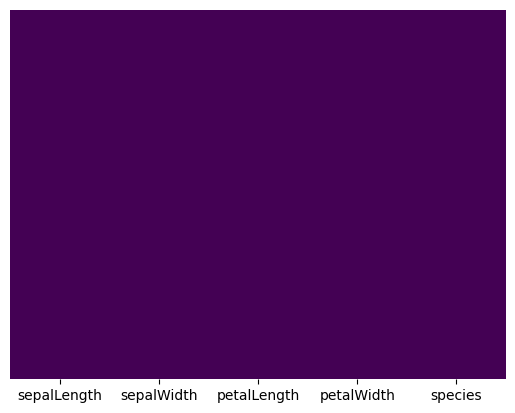

In [16]:
import seaborn as sns
sns.heatmap(iris_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='petalLength', ylabel='count'>

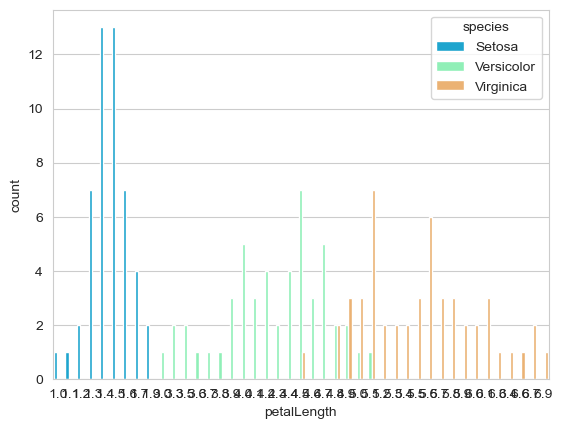

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='petalLength',hue='species',data=iris_df,palette='rainbow')

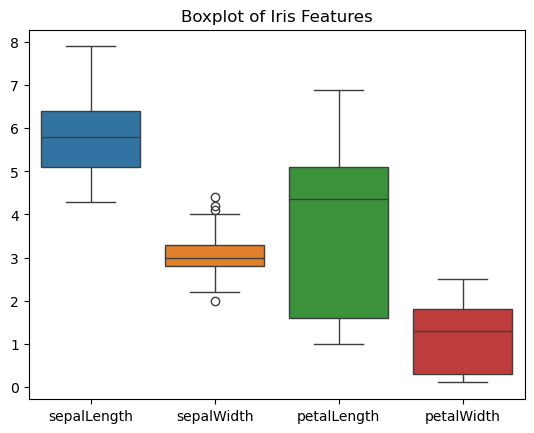

In [18]:
# Boxplots
sns.boxplot(data=iris_df)
import matplotlib.pyplot as plt
plt.title("Boxplot of Iris Features")
plt.show()

In [22]:
#Known the Datatypes
iris_df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
species         object
dtype: object

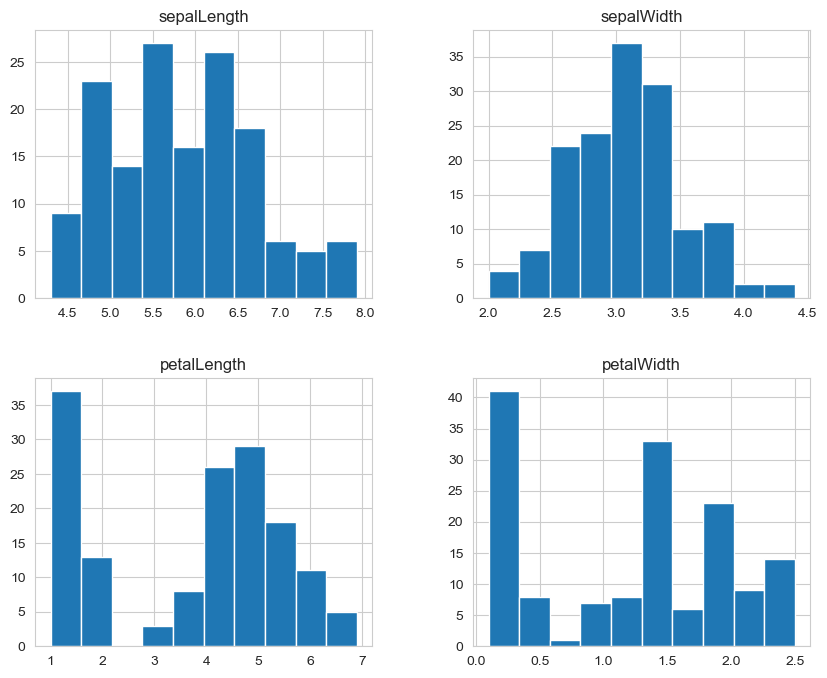

In [24]:
# Histograms
iris_df.hist(figsize=(10, 8))
plt.show()